# Tilted Lens

In this example, we reproduce the results of [this work](https://www.sciencedirect.com/science/article/abs/pii/S0375960113001953?casa_token=4qY1zlrA1jAAAAAA:siRwxg9tPju8XHJkGtAjGVXJacg7pBbaZyFJUQscNaQplQ2ciYyoMQOlTexOlyaW9VSQBDViPph4), where it is shown that a tilted lens can "transform" a Laguerre-Gauss mode in a diagonal Hermite-Gauss mode.

Here, we initialize the package and define the experimental parameters:

In [1]:
using StructuredLight

#All quantities have unit of (inverse) meter

w0 = 0.16e-3 #Waist
λ = 632.8e-9 #Wavelength
k = 2π/λ #Wavenumber
f = 50e-2 #Focal length of the lens

z₀ = 3.1 #Distance away from the focus where the beam encounters the lens

z_cr = z₀/(z₀/f-1) #Conversion distance

ξ = deg2rad(6); #Tilting angle

Now, we setup our grid and the initial profile by including the action of a tilted lens:

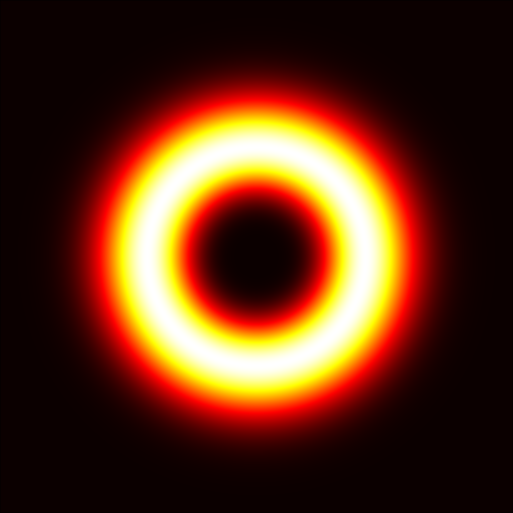

In [5]:
rs = LinRange(-70w0,70w0,1024)
ψ₀ = lg(rs,rs,z₀,l=3,w0=w0,k=k) .* tilted_lens(rs,rs,f,ξ,k=k)
visualize(ψ₀)

Now we propagate. Note that we introduce a scalling of ```0.015```, because, otherwise, the beam would be to small.

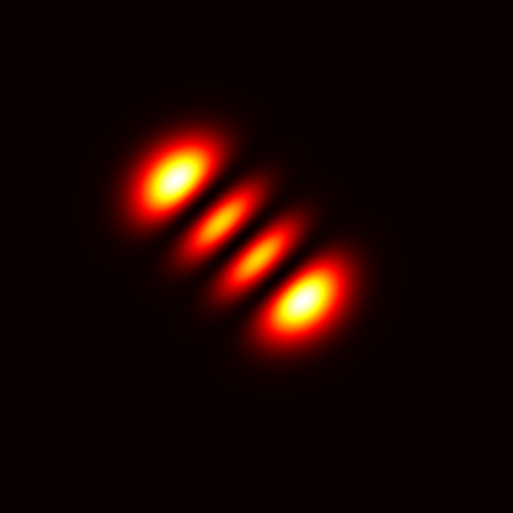

In [6]:
ψ = free_propagation(ψ₀,rs,rs,z_cr,0.015,k=k)
visualize(ψ)

By changing the initial angular momentum, one obtains different HG modes.